<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/Wheat_on_Chessboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##小麦とチェス盤問題
###【問題1】２×２マスのチェス盤の小麦の数

In [12]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [13]:
import numpy as np
import numpy as np

small_board_ndarray = np.array(small_board_list)
small_board_ndarray = np.reshape(small_board_ndarray, (2,2))
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[[1 2]
 [4 8]]


###【問題2】ｎ×ｍマスへの拡張

In [21]:
def board_list(n,m):
    small_board_list = [1]
    for _ in range(n * m - 1):
        small_board_list.append(2 * small_board_list[-1])
    small_board_ndarray = np.array(small_board_list)
    small_board_ndarray = np.reshape(small_board_ndarray, (n,m))
    return small_board_ndarray, "合計：{}".format(np.sum(small_board_ndarray))
board_list(8,8)

(array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
         1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
        [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
         4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
        [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
         1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
        [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
         2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09],
        [4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
         6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
        [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
         1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
        [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
         4.50359963e+15, 9.00719925e+15, 1.80

この関数board_list(n,m) によって、ｎ×ｍマスのチェス盤の各マスの小麦の数、そしてその合計が求められる。

###【問題3】小麦の数の合計
チェス盤の小麦の数の合計は、【問題2】の最後に求めた通り。
ここでは、各列の平均を求め棒グラフで可視化する。

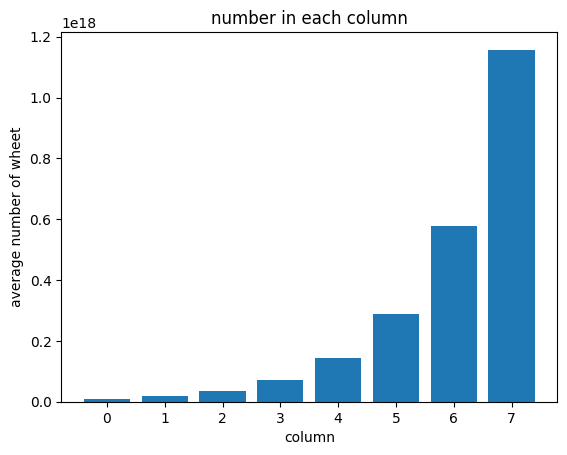

In [42]:
import numpy as np
%matplotlib inline

# Call board_list to generate the ndarray
small_board_ndarray, total = board_list(8,8) # Update to create an 8x8 array

average_wheat_per_column = np.mean(small_board_ndarray, axis=0)

plt.xlabel("column")
plt.ylabel("average number of wheet")
plt.title("number in each column")
# Pass average_wheat_per_column as the height argument to plt.bar
plt.bar(np.array(range(8)), average_wheat_per_column)
plt.show()

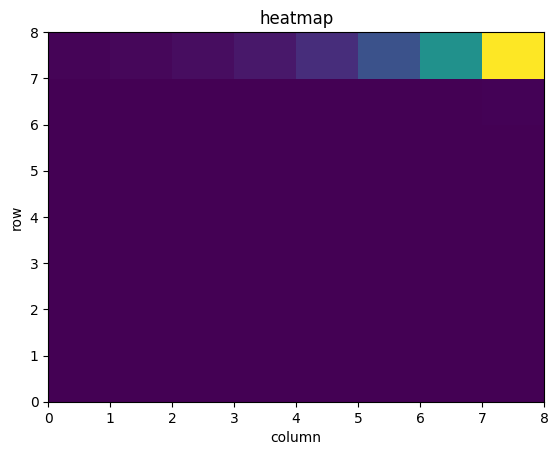

In [40]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array(small_board_ndarray))
plt.show()

###【問題5】後半は前半の何倍か

In [65]:
np.sum(small_board_ndarray[:4, :])

4294967295.0

In [66]:
np.sum(small_board_ndarray[4:, :])

1.8446744069414584e+19

In [67]:
1.8446744069414584e+19 / 4294967295.0

4294967296.0

後半の4行8列は、それぞれの要素が前半の4行8列の2**32乗である。

###【問題6】他の計算方法によるｎ×ｍマスへの拡張

In [70]:
# np.append を使う
n_squares = 64
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
small_board_ndarray = np.reshape(small_board_ndarray, (8,8))
print("8*8マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

8*8マスの板に小麦を並べる（ndarray）：[[                   1                    2                    4
                     8                   16                   32
                    64                  128]
 [                 256                  512                 1024
                  2048                 4096                 8192
                 16384                32768]
 [               65536               131072               262144
                524288              1048576              2097152
               4194304              8388608]
 [            16777216             33554432             67108864
             134217728            268435456            536870912
            1073741824           2147483648]
 [          4294967296           8589934592          17179869184
           34359738368          68719476736         137438953472
          274877906944         549755813888]
 [       1099511627776        2199023255552        4398046511104
         8796093022208       1759218

<ipython-input-70-194fe6c4ae7f>:5: RuntimeWarning: overflow encountered in scalar multiply
  small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])


In [72]:
# ブロードキャスト
n_squares = 64
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
small_board_ndarray = np.reshape(small_board_ndarray, (8,8))
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[[                   1                    2                    4
                     8                   16                   32
                    64                  128]
 [                 256                  512                 1024
                  2048                 4096                 8192
                 16384                32768]
 [               65536               131072               262144
                524288              1048576              2097152
               4194304              8388608]
 [            16777216             33554432             67108864
             134217728            268435456            536870912
            1073741824           2147483648]
 [          4294967296           8589934592          17179869184
           34359738368          68719476736         137438953472
          274877906944         549755813888]
 [       1099511627776        2199023255552        4398046511104
         8796093022208       175921860

In [74]:
### 「ndarrayの型」のサンプルコード試用
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

最後のマスの小麦の数：9223372036854775808


##【問題7】計算時間の比較

In [76]:
%%timeit
# 最初に作った関数
def board_list(n,m):
    small_board_list = [1]
    for _ in range(n * m - 1):
        small_board_list.append(2 * small_board_list[-1])
    small_board_ndarray = np.array(small_board_list)
    small_board_ndarray = np.reshape(small_board_ndarray, (n,m))
    return small_board_ndarray, "合計：{}".format(np.sum(small_board_ndarray))
board_list(8,8)

25.4 µs ± 786 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [78]:
%%timeit
# np.append を使う
n_squares = 64
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
small_board_ndarray = np.reshape(small_board_ndarray, (8,8))

<magic-timeit>:5: RuntimeWarning: overflow encountered in scalar multiply


351 µs ± 75.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [79]:
%%timeit
# ブロードキャスト
n_squares = 64
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
small_board_ndarray = np.reshape(small_board_ndarray, (8,8))

5.47 µs ± 659 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


結果を見ると、for文を回すよりもブロードキャストを用いている3つ目のプログラムが最も実行速度が速い。
for文を用いた2つに関しては、Pythonのリストを作成する方がndarrayを用いるよりもオーダー1つ分速く実行することができる。
numpyのデータ自動統一機能は大幅に計算時間を短くすることから、大きな値や多くの値を扱う時に非常に有効なメソッドということが分かった。